In [1]:
import numpy as np
from sound import *
import matplotlib.pyplot as plt
%matplotlib inline

* Read in the speech file

In [2]:
x, fs = wavread('speech8kHz.wav')

('Number of channels: ', 1)
('Number of bytes per sample:', 2)
('Sampling rate: ', 8000)
('Number of samples:', 60246)


* Normalized float, $-1<x<1$

In [3]:
x = np.array(x,dtype=float)/2**15
print np.size(x)

60246


In [4]:
e = np.zeros(np.size(x))
h = np.zeros(10)
xrek = np.zeros(np.size(x))
P = 0

* Have same 0 starting values as in decoder:

In [5]:
x[0:10] = 0.0
quantstep = 0.05
for n in range(10, len(x)):
    if n > 4000 and n < 4010:
        print "encoder h: ", h, "e=", e
    
    #prediction error and filter, using the vector of the time reversed IR:
    #predicted value from past reconstructed values:
    P=np.dot(xrek[n-10+np.arange(0,10)], np.flipud(h))

    #quantize and de-quantize e to step-size 0.05 (mid tread):
    e[n]=np.round((x[n]-P)/quantstep)*quantstep;

    #Decoder in encoder:
    #new reconstructed value:
    xrek[n]=e[n]+P;
    #LMS update rule:
    h = h + 1.0* e[n]*np.flipud(xrek[n-10+np.arange(0,10)])

encoder h:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] e= [ 0.  0.  0. ...,  0.  0.  0.]
encoder h:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] e= [ 0.  0.  0. ...,  0.  0.  0.]
encoder h:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] e= [ 0.  0.  0. ...,  0.  0.  0.]
encoder h:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] e= [ 0.  0.  0. ...,  0.  0.  0.]
encoder h:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] e= [ 0.  0.  0. ...,  0.  0.  0.]
encoder h:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] e= [ 0.  0.  0. ...,  0.  0.  0.]
encoder h:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] e= [ 0.  0.  0. ...,  0.  0.  0.]
encoder h:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] e= [ 0.  0.  0. ...,  0.  0.  0.]
encoder h:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] e= [ 0.  0.  0. ...,  0.  0.  0.]


In [6]:
print "Mean squared prediction error:", np.dot(e, e) / np.max(np.size(e))

Mean squared prediction error: 0.000559165753743


* Without quant.: 0.000215852452838<br/>
 with quant.: 0.000532170587442

* Listen to it:

In [7]:
sound(2**15*e, fs)

* done


* Plot the predicted error and compare it with the original signal

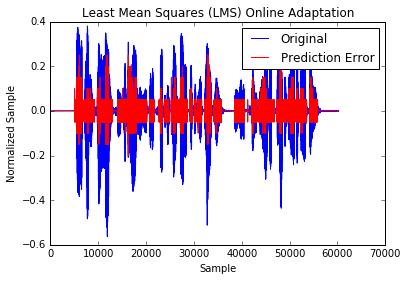

In [8]:
plt.figure()
plt.plot(x)
#plt.hold(True)
plt.plot(e,'r')
plt.xlabel('Sample')
plt.ylabel('Normalized Sample')
plt.title('Least Mean Squares (LMS) Online Adaptation')
plt.legend(('Original','Prediction Error'))
plt.show()

* Decoder

In [9]:
h = np.zeros(10);
xrek = np.zeros(np.size(x));
for n in range(10, len(x)):
    if n > 4000 and n< 4010:
        print "decoder h: ", h
    P=np.dot(xrek[n-10+np.arange(10)], np.flipud(h))
    xrek[n] = e[n] + P
    #LMS update:
    h = h + 1.0 * e[n]*np.flipud(xrek[n-10+np.arange(10)])

decoder h:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
decoder h:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
decoder h:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
decoder h:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
decoder h:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
decoder h:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
decoder h:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
decoder h:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
decoder h:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


* Plotting the reconstructed signal.

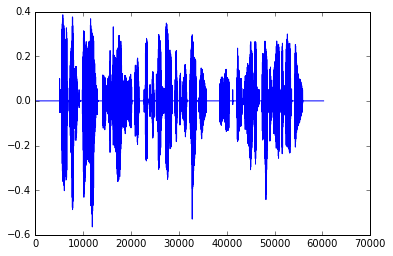

In [10]:
plt.plot(xrek)
plt.show()

* Listen to the reconstructed signal:

In [11]:
sound(2**15*xrek,fs)

* done


**Observe**: Because of the quantization, the prediction error now clearly increased.

**Observe:** The signal is now **fully decoded**, even with quantization, although with a little noise, which was to
be expected. But we can avoid the noise by reducing the quantization step size.

Observe that this structure for the **decoder in the encoder also applies to the other prediction methods.**
